# Hands on Machine Learning with SciKit Learn Keras and Tensorflow

## Chapter 8: Dimensionality Reduction

**Dataset courtesy of Machine Learning Group - ULB on Kaggle**: https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [33]:
import pandas as pd
import numpy as np

In [21]:
data_import = pd.read_csv("creditcard.csv")
data_import

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Breaking up our dataset into constituent parts

In [22]:
extra_columns = data_import[["Time", "Amount"]]
y = data_import["Class"]
X = data_import.iloc[:, 1:-2]
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


### Simple PCA Into 2 Dimensions

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [24]:
X2D

array([[ 1.35979766,  0.07194748],
       [-1.19186308, -0.2648433 ],
       [ 1.35837053,  1.34127962],
       ...,
       [-1.91957718,  0.30152418],
       [ 0.24043213, -0.53178177],
       [ 0.53341583,  0.18993868]])

### Choosing the Right Number of Dimensions

In [37]:
# How many dimensions do we need to explain a large amount of the variance

pca = PCA()

pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print("95% of variance explained by ", d, " variables")

95% of variance explained by  22  variables


In [38]:
cumsum

array([0.12483757, 0.21356702, 0.28837636, 0.35360784, 0.41559829,
       0.47335421, 0.52315273, 0.56956969, 0.60884466, 0.64742333,
       0.68132481, 0.71381239, 0.7460451 , 0.77594586, 0.80320759,
       0.82819207, 0.85166522, 0.87452552, 0.89608823, 0.91542731,
       0.93298321, 0.95011992, 0.96280874, 0.97474451, 0.9835865 ,
       0.99115334, 0.99645466, 1.        ])

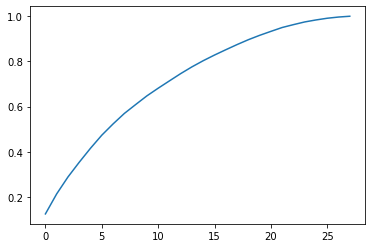

In [43]:
# How the PCA improves over time

plt.plot(cumsum)

In [39]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
X_reduced

array([[ 1.35980713e+00,  7.27811733e-02, -2.53634674e+00, ...,
        -2.51412098e-01,  1.83067779e-02, -2.77837576e-01],
       [-1.19185711e+00, -2.66150712e-01, -1.66480113e-01, ...,
         6.90831352e-02,  2.25775248e-01,  6.38671953e-01],
       [ 1.35835406e+00,  1.34016307e+00, -1.77320934e+00, ...,
        -5.24979725e-01, -2.47998153e-01, -7.71679402e-01],
       ...,
       [-1.91956501e+00,  3.01253846e-01,  3.24963981e+00, ...,
        -1.39597029e-03, -2.32045036e-01, -5.78229010e-01],
       [ 2.40440050e-01, -5.30482513e-01, -7.02510230e-01, ...,
        -1.27433516e-01, -2.65244916e-01, -8.00048741e-01],
       [ 5.33412522e-01,  1.89733337e-01, -7.03337367e-01, ...,
        -3.82948105e-01, -2.61057331e-01, -6.43078438e-01]])

## Reconstructing PCA

In [40]:
X_recovered = pca.inverse_transform(X_reduced)
X_recovered

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
         1.84504010e-15, -1.29816130e-15, -1.52391611e-15],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
         8.63660067e-16, -1.10561693e-15, -8.10511560e-17],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
         1.96676377e-15, -3.94394113e-15,  1.26093986e-16],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
         2.00016072e-15, -1.53123211e-15, -6.49180175e-16],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         4.78748377e-15, -1.23715148e-15, -2.30878212e-15],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
         1.57613499e-15, -5.62641597e-16,  8.21944963e-17]])

## Kernel PCA (kPCA)

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA

clf = Pipeline([
								("kpca", KernelPCA(n_components=2)),
								("log_reg", LogisticRegression())
])

param_grid = [{
							"kpca__gamma":np.linspace(0.03, 0.05, 10),
							"kpca__kernel":["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

In [ ]:
print(grid_search.best_params_)

Error: Kernel is dead

## Visualizing Multi-Dimensional Data Through PCA

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
X3D = pca.fit_transform(X)
X3D

array([[ 1.3591329 ,  0.07624735, -2.52741105],
       [-1.19261815, -0.27846868, -0.15162309],
       [ 1.35864651,  1.32483483, -1.74248906],
       ...,
       [-1.91989017,  0.2946233 ,  3.25670823],
       [ 0.23811732, -0.51370143, -0.6803348 ],
       [ 0.53390158,  0.19286905, -0.69498242]])

In [26]:
pca_plot_data = pd.DataFrame(X3D)
pca_plot_data["Class"] = y
pca_plot_data = pca_plot_data#.sample(1000) # Without sampling the notebook is significantly larger
pca_plot_data

,0,1,2,Class
175219,-0.169011,-1.004542,0.091718,0
126233,-1.226927,-0.015381,-0.088381,0
202520,2.129149,0.623872,1.110795,0
198243,-2.019937,-0.111606,1.589332,0
20657,-1.187521,0.233228,-0.517378,0
...,...,...,...,...
27696,0.361702,-1.120247,-1.179236,0
154111,0.804120,0.253011,-2.089949,0
72069,5.950012,-4.163088,-0.304790,0
34254,1.313709,-1.237707,-0.419505,0


In [27]:
# import matplotlib.pyplot as plt

# plt.scatter(x=pca_plot_data[0], y=pca_plot_data[1], c=pca_plot_data["Class"], alpha=0.5)

In [28]:
import plotly.express as px

fig = px.scatter_3d(pca_plot_data, x=0, y=1, z=2,
              color='Class')
fig.show()

In [29]:
pca_plot_data_fraud = pca_plot_data[pca_plot_data["Class"] == 1]
pca_plot_data_fraud

,0,1,2,Class
223366,-1.113828,-2.142301,3.712783,1


In [30]:
fig_fraud = px.scatter_3d(pca_plot_data_fraud, x=0, y=1, z=2,
              color='Class')
fig_fraud.show()

In [31]:
pca_plot_data_not_fraud = pca_plot_data[pca_plot_data["Class"] == 0]
pca_plot_data_not_fraud

,0,1,2,Class
175219,-0.169011,-1.004542,0.091718,0
126233,-1.226927,-0.015381,-0.088381,0
202520,2.129149,0.623872,1.110795,0
198243,-2.019937,-0.111606,1.589332,0
20657,-1.187521,0.233228,-0.517378,0
...,...,...,...,...
27696,0.361702,-1.120247,-1.179236,0
154111,0.804120,0.253011,-2.089949,0
72069,5.950012,-4.163088,-0.304790,0
34254,1.313709,-1.237707,-0.419505,0


In [32]:
fig_not_fraud = px.scatter_3d(pca_plot_data_not_fraud, x=0, y=1, z=2,
              color='Class')

fig_not_fraud.show()